In [1]:
import re # regular expressions
import nltk # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", None)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/NG_tweets.csv')

df.head()

,tweets,subjectivity,polarity,analysis
0,Still Don't know where my dear country Nigeria is heading\nInsecurity\nHunger\nGivernment failures\njudiciary not trusted\nHow can the poor survive.\nGod save Nigeria,0.6,-0.4,Negative
1,"WFP links record hunger levels to pandemic, conflict, climate change",0.0,0.0,Neutral
2,"WFP links record hunger levels to pandemic, conflict, climate change",0.0,0.0,Neutral
3,": WFP links record hunger levels to pandemic, conflict, climate change",0.0,0.0,Neutral
4,: Hunger in the northeast Nigeria will spike more conflicts …,0.5,0.5,Positive


## Text Analysis

**Let's Explore what Nigeria Tweets is all about to get a sense of the data if we doing the right thing**

In [3]:
# check for duplicates
print(df.shape)
df = df.drop_duplicates()
print(df.shape)


(4062, 4)
(1340, 4)


Lots of duplicates values in the tweets more than 70% Now that cleaning damn!!

In [4]:
# check for missing values if any drop
print(df.shape)
df = df.dropna()
print(df.shape)


(1340, 4)
(1339, 4)


Looks like after dropping duplicates we have no missing values

In [5]:
# check dtypes of each feature
print('Data Types')
print('---------'*10)
print(df.info())

Data Types
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 4052
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweets        1339 non-null   object 
 1   subjectivity  1339 non-null   float64
 2   polarity      1339 non-null   float64
 3   analysis      1339 non-null   object 
dtypes: float64(2), object(2)
memory usage: 52.3+ KB
None


<AxesSubplot:>

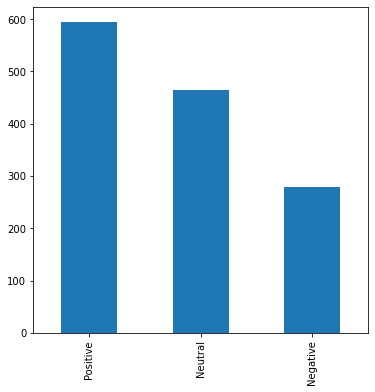

In [6]:
# convert analysis column to integer
df['analysis'].value_counts().plot(kind='bar', figsize=(6,6))

In [7]:
# assign positive to 1, Neutral to 0 and Negative to -1
df['analysis'] = df['analysis'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1}).astype(int)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 4052
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweets        1339 non-null   object 
 1   subjectivity  1339 non-null   float64
 2   polarity      1339 non-null   float64
 3   analysis      1339 non-null   int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 47.1+ KB


#### Lemmatization and Stematization

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABUTON\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(str(df['tweets'][1]))
print(words)
# df['tweets'][1]

['WFP', 'links', 'record', 'hunger', 'levels', 'to', 'pandemic', ',', 'conflict', ',', 'climate', 'change']


In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABUTON\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['WFP', 'links', 'record', 'hunger', 'levels', 'pandemic', ',', 'conflict', ',', 'climate', 'change']


In [39]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['wfp', 'link', 'record', 'hunger', 'level', 'pandem', ',', 'conflict', ',', 'climat', 'chang']


In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABUTON\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [42]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['WFP', 'link', 'record', 'hunger', 'level', 'pandemic', ',', 'conflict', ',', 'climate', 'change']


In [43]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['WFP', 'link', 'record', 'hunger', 'level', 'pandemic', ',', 'conflict', ',', 'climate', 'change']


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# import gensim 

In [10]:
bow_vectorizer = CountVectorizer(max_df=.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer = bow_vectorizer.fit_transform(df['tweets'])
bow_vectorizer.shape

(1339, 1000)

In [11]:
# TF = (Number of times term t appears in a document) / (Number of terms in the document)
# IDF = log(N/n), where, N is the number of documents and n is the number of documents a term has appeared in
# TF-IDF = TF*IDF


tf_idf_vectorizer = TfidfVectorizer(max_df=.90, min_df=2, max_features=1000, stop_words='english')
tf_idf = pd.DataFrame(tf_idf_vectorizer.fit_transform(df['tweets']).toarray(), columns=tf_idf_vectorizer.get_feature_names())
tf_idf.shape

(1339, 1000)

In [12]:
tf_idf.head(3)

,__,_africa,_cakes,_farouq,_food,_fsh,_ja,_ng,_nigeria,_of_lagos,...,yes,yoruba,young,youth,youths,zero,zimbabwe,zoo,àdìre,églises
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Word2Vec Features

#### Word2Vec Embeddings are based on
<p> Continuous Bag of Words (CBOW) and Skip-gram model</p>
<p> CBOW tends to predict the probability of a word given a context </p>
<p>Skip-gram is the opposite, it tries to predict the context given the word</p>

In [25]:
import gensim
# lets train a word2vec on our corpus
tokenized_tweet = df['tweets'].apply(lambda x: x.split())

model_w2v = gensim.models.Word2Vec(tokenized_tweet, 
                                  size=200, # desired number of features/ independent variables
                                  window=5, # context window size
                                  min_count=2,
                                  sg=1, # 1 for skip-gram model
                                  hs=0,
                                  negative=10, # for  negative sampling
                                  workers=2, # no.of cores
                                  seed=34)

model_w2v.train(tokenized_tweet, total_examples=len(df['tweets']), epochs=20)

(495335, 738460)

In [27]:
# Let play with our Word2Vec model and see how it performs
# we will specify a word and the model will pull out the most similar words from the corpus

model_w2v.wv.most_similar(positive='insecurity')

[('polio', 0.857085108757019),
 ('everywhere.', 0.847568690776825),
 ('poliofree', 0.8417650461196899),
 ('address', 0.8389028310775757),
 ('rose', 0.8368113040924072),
 ('head', 0.8337514400482178),
 ('fastest', 0.8324134349822998),
 ('lacking', 0.8312587141990662),
 ('foods', 0.828781008720398),
 ('wild', 0.8280803561210632)]

In [30]:
# Still Playing 
model_w2v.wv.most_similar(positive='supply')

[('chains', 0.8466651439666748),
 ('chemicals', 0.8337732553482056),
 ('important.', 0.8215525150299072),
 ('toxic', 0.8157706260681152),
 ('epileptic', 0.8016002178192139),
 ('crops', 0.7981507778167725),
 ('along', 0.7925853729248047),
 ('Elimination', 0.7905422449111938),
 ('affecting', 0.7894235253334045),
 ('country,', 0.7727617025375366)]

In [31]:
# let check the vector representation of any word from our corpus

print(model_w2v['food'])
print(len(model_w2v['food']))

[-0.31569937 -0.24756722  0.3080822  -0.45784333 -0.21697754 -0.18244073
  0.18578516  0.34417364  0.20207807  0.20920347 -0.09294654  0.00061577
  0.13806966  0.11416349  0.17130673 -0.01465261 -0.05817071 -0.29717517
 -0.1930512   0.21360582  0.01235877  0.03201896 -0.0284075   0.10049054
 -0.15364872  0.0286955  -0.13232404 -0.17457804 -0.04712316 -0.43420327
  0.10076919  0.0395518   0.23662172 -0.11921836  0.02959005  0.17109236
 -0.4761038   0.29869744 -0.12796535 -0.03052701 -0.564806    0.13947451
 -0.01580761  0.33427334  0.3322891   0.05345676 -0.06601372  0.0968715
  0.16583315 -0.23054416  0.26838842 -0.27106705  0.08195201 -0.3275129
  0.48243394  0.4906531  -0.19897883  0.14375235 -0.03708821 -0.28076833
  0.13351901 -0.40291113  0.26359853 -0.16296987 -0.11484902  0.3413127
  0.08606453  0.16285002  0.15893912 -0.15082544  0.1657976   0.13960582
  0.30406356 -0.11988617 -0.01392338  0.10024761 -0.07802346  0.18656641
 -0.23138787  0.17118621  0.14961804  0.18088946 -0.12

**Document Embedding**

**Doc2Vec Embedding**

In [32]:
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import LabeledSentence

# to implement doc2vec, we have to labelise or tag each tokenized with uniqueIds

def add_labels(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ['tweet_' + str(i)]))
    return output

labeled_tweets = add_labels(tokenized_tweet) # label all the tweets

labeled_tweets[:6]

[LabeledSentence(words=['Still', "Don't", 'know', 'where', 'my', 'dear', 'country', 'Nigeria', 'is', 'heading', 'Insecurity', 'Hunger', 'Givernment', 'failures', 'judiciary', 'not', 'trusted', 'How', 'can', 'the', 'poor', 'survive.', 'God', 'save', 'Nigeria'], tags=['tweet_0']),
 LabeledSentence(words=['WFP', 'links', 'record', 'hunger', 'levels', 'to', 'pandemic,', 'conflict,', 'climate', 'change'], tags=['tweet_1']),
 LabeledSentence(words=[':', 'WFP', 'links', 'record', 'hunger', 'levels', 'to', 'pandemic,', 'conflict,', 'climate', 'change'], tags=['tweet_3']),
 LabeledSentence(words=[':', 'Hunger', 'in', 'the', 'northeast', 'Nigeria', 'will', 'spike', 'more', 'conflicts', '…'], tags=['tweet_4']),
 LabeledSentence(words=[':', 'As', 'necessary', 'as', 'the', 'COVIDLockdown', 'is,', 'the', 'INSENSITIVE', 'Cabal', 'ruling', 'Nigeria', 'continues', 'to', 'ignore', 'the', 'rising', 'hunger/hards…'], tags=['tweet_5']),
 LabeledSentence(words=['Then', 'how', 'come', 'poverty,', 'hunger,you

In [33]:
# Let train a doc2vvec model
model_d2v = gensim.models.Doc2Vec(dm=1, # for distributed memory
                                 dm_mean=1, # fo  using mean of th context word vectors
                                 size=200, # no of features
                                 window=5, #width of the context window
                                 negative=7, # if > 0 then negative sampling will be used
                                 min_count=3, # ignores all words with total frequency lower than 3
                                 workers=3, # no of cores
                                 alpha=.1, #learning rate
                                 seed=23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples=len(df['tweets']), epochs=15)

100%|██████████████████████████████████████████████████████████████████████████| 1339/1339 [00:00<00:00, 335554.34it/s]


In [34]:
# preparing doc2vec feature set
docvev_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(df)):
    docvev_arrays[i,:] = model_d2v.docvecs[i].reshape((1, 200))
    
docvec_df = pd.DataFrame(docvev_arrays)
docvec_df.shape

(1339, 200)

### Models

In [ ]:
# Word2Vc features
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

X_train, X_val, y_train, y_val = train_test_split(train_w2v, train['label'], random_state=42, test_size=.2)

lreg.fit(X_train, y_train)
pred = lreg.predict_proba(X_val)
pred_int = pred[:,1] >= .3
pred_int = pred_int.astype(np.int)

print(metrics.f1_score(pred_int, y_val)) 